In [44]:
import scipy.io as sio
import matplotlib.pyplot as plt

import os
import glob

import numpy as np



In [45]:
Patient_id = np.unique(sio.loadmat("Sample Data/trials_subNums.mat")['subjectNum'][0]) #corresponding to the patient id
dir = "./"
models = ["LSTM", "MaxCNN", "Mix", "TempCNN"]


In [46]:
Results = np.zeros((len(Patient_id), len(models),20))   # (13,5,20)


In [47]:
inc = 0
for model in models:
    inc_patient = 0
    for patient in Patient_id:
        doc = glob.glob(dir+"*"+model+"*"+"t"+str(patient)+".mat")[0]
        file = sio.loadmat(doc)['res']
        Results[inc_patient,inc, :] = file[:,3]
        inc_patient += 1
    inc += 1

In [48]:
# 在Results最后一维上平均
Results_mean = np.mean(Results, axis=2)
print(Results_mean.shape)

(13, 4)


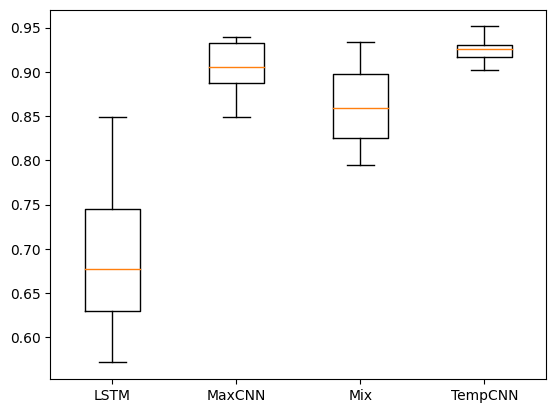

In [49]:
# 绘制箱线图
plt.boxplot(Results_mean, labels=models)
plt.savefig("boxplot_my.png")
plt.show()
